In [19]:
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.layers import Activation, LSTM, Dense
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import pandas as pd

data = pd.read_csv('17K_Tweet.csv',engine='python',sep = ';')
sentences_training = [doc for doc in data.iloc[:,0]]
data_label = [doc for doc in data.iloc[:,1]]
   

In [20]:
for i in range(0, len(data_label)):
  if data_label[i] == "olumlu":
    data_label[i] = 2
  elif data_label[i] == "olumsuz":
    data_label[i] = 0
  elif data_label[i] == "notr" :
    data_label[i] = 1

In [21]:
token = Tokenizer()
token.fit_on_texts(sentences_training)
x = token.texts_to_sequences(sentences_training)
x = pad_sequences(x)

scaler = StandardScaler()
x = scaler.fit_transform(x)

encode = preprocessing.LabelEncoder()
y = encode.fit_transform(data_label)
y = to_categorical(y)


In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20)  

In [23]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding

model=Sequential()
model.add(Embedding(10000, 64, input_length=x.shape[1]))
model.add (LSTM(8, return_sequences=True))
model.add (LSTM(4,return_sequences=False))
model.add(Dense(3,activation='softmax'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=25,batch_size=32,verbose=1, validation_data=(x_test, y_test))
predictions=model.predict(x_test)
scores=model.evaluate(x_test,y_test)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Train on 13830 samples, validate on 3458 samples
Epoch 1/25
13830/13830 [==============================] - 54s 4ms/step - loss: 0.5739 - accuracy: 0.7067 - val_loss: 0.5410 - val_accuracy: 0.7220
Epoch 2/25
13830/13830 [==============================] - 47s 3ms/step - loss: 0.5334 - accuracy: 0.7306 - val_loss: 0.5275 - val_accuracy: 0.7390
Epoch 3/25
13830/13830 [==============================] - 48s 3ms/step - loss: 0.5211 - accuracy: 0.7372 - val_loss: 0.5158 - val_accuracy: 0.7404
Epoch 4/25
13830/13830 [==============================] - 48s 3ms/step - loss: 0.5138 - accuracy: 0.7400 - val_loss: 0.5062 - val_accuracy: 0.7415
Epoch 5/25
13830/13830 [==============================] - 49s 4ms/step - loss: 0.5085 - accuracy: 0.7425 - val_loss: 0.5005 - val_accuracy: 0.7446
Epoch 6/25
13830/13830 [==============================] - 48s 3ms/step - loss: 0.5043 - accuracy: 0.7437 - val_loss: 0.4963 - val_accuracy: 0.7479
Epoch 7/25
13830/13830 [==============================] - 45s 3ms/ste

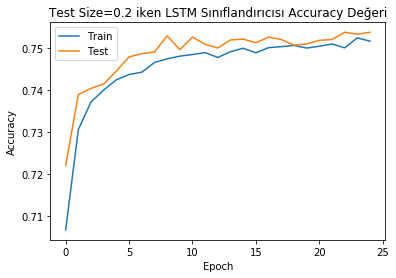

In [24]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Test Size=0.2 iken LSTM Sınıflandırıcısı Accuracy Değeri')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

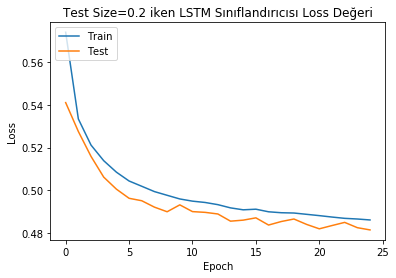

In [25]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Test Size=0.2 iken LSTM Sınıflandırıcısı Loss Değeri')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.5)  

In [27]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding

model=Sequential()
model.add(Embedding(10000, 64, input_length=x.shape[1]))
model.add (LSTM(8, return_sequences=True))
model.add (LSTM(4,return_sequences=False))
model.add(Dense(3,activation='softmax'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=25,batch_size=32,verbose=1, validation_data=(x_test, y_test))
predictions=model.predict(x_test)
scores=model.evaluate(x_test,y_test)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Train on 8644 samples, validate on 8644 samples
Epoch 1/25
8644/8644 [==============================] - 47s 5ms/step - loss: 0.5853 - accuracy: 0.6950 - val_loss: 0.5508 - val_accuracy: 0.7271
Epoch 2/25
8644/8644 [==============================] - 35s 4ms/step - loss: 0.5364 - accuracy: 0.7297 - val_loss: 0.5398 - val_accuracy: 0.7090
Epoch 3/25
8644/8644 [==============================] - 37s 4ms/step - loss: 0.5233 - accuracy: 0.7329 - val_loss: 0.5225 - val_accuracy: 0.7339
Epoch 4/25
8644/8644 [==============================] - 36s 4ms/step - loss: 0.5184 - accuracy: 0.7366 - val_loss: 0.5199 - val_accuracy: 0.7353
Epoch 5/25
8644/8644 [==============================] - 36s 4ms/step - loss: 0.5147 - accuracy: 0.7382 - val_loss: 0.5170 - val_accuracy: 0.7358
Epoch 6/25
8644/8644 [==============================] - 36s 4ms/step - loss: 0.5114 - accuracy: 0.7384 - val_loss: 0.5145 - val_accuracy: 0.7385
Epoch 7/25
8644/8644 [==============================] - 35s 4ms/step - loss: 0.508

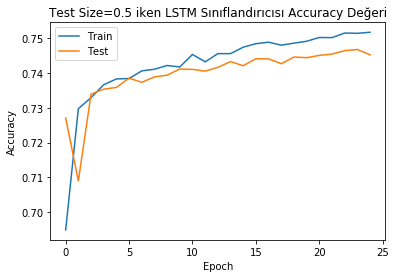

In [28]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Test Size=0.5 iken LSTM Sınıflandırıcısı Accuracy Değeri')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

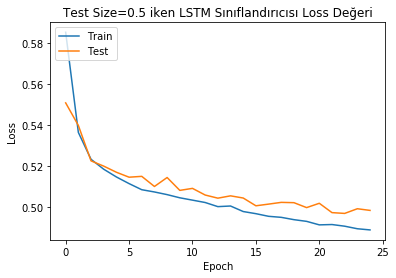

In [29]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Test Size=0.5 iken LSTM Sınıflandırıcısı Loss Değeri')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.7)  

In [31]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding

model=Sequential()
model.add(Embedding(10000, 64, input_length=x.shape[1]))
model.add (LSTM(8, return_sequences=True))
model.add (LSTM(4,return_sequences=False))
model.add(Dense(3,activation='softmax'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=25,batch_size=32,verbose=1, validation_data=(x_test, y_test))
predictions=model.predict(x_test)
scores=model.evaluate(x_test,y_test)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Train on 5186 samples, validate on 12102 samples
Epoch 1/25
5186/5186 [==============================] - 34s 7ms/step - loss: 0.6141 - accuracy: 0.6768 - val_loss: 0.5855 - val_accuracy: 0.7100
Epoch 2/25
5186/5186 [==============================] - 23s 4ms/step - loss: 0.5798 - accuracy: 0.7059 - val_loss: 0.5613 - val_accuracy: 0.7218
Epoch 3/25
5186/5186 [==============================] - 23s 4ms/step - loss: 0.5618 - accuracy: 0.7189 - val_loss: 0.5495 - val_accuracy: 0.7276
Epoch 4/25
5186/5186 [==============================] - 23s 4ms/step - loss: 0.5510 - accuracy: 0.7248 - val_loss: 0.5386 - val_accuracy: 0.7324
Epoch 5/25
5186/5186 [==============================] - 23s 4ms/step - loss: 0.5430 - accuracy: 0.7284 - val_loss: 0.5314 - val_accuracy: 0.7340
Epoch 6/25
5186/5186 [==============================] - 24s 5ms/step - loss: 0.5366 - accuracy: 0.7296 - val_loss: 0.5269 - val_accuracy: 0.7314
Epoch 7/25
5186/5186 [==============================] - 23s 5ms/step - loss: 0.53

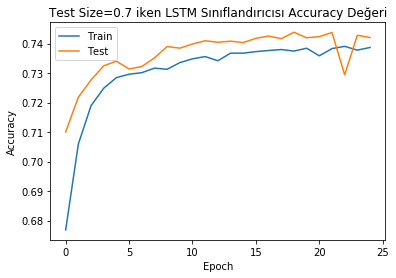

In [32]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Test Size=0.7 iken LSTM Sınıflandırıcısı Accuracy Değeri')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

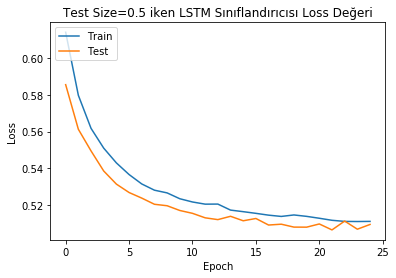

In [33]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Test Size=0.5 iken LSTM Sınıflandırıcısı Loss Değeri')
plt.legend(['Train','Test'], loc='upper left')
plt.show()